In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [89]:
df_index = pd.read_csv('Dataset/economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [90]:
# drop unncessary coloum
df_index.drop(columns=["Unnamed: 0", "year", "month"], axis=1, inplace=True)

In [91]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [92]:
## checka ll the null values
df_index.isna().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

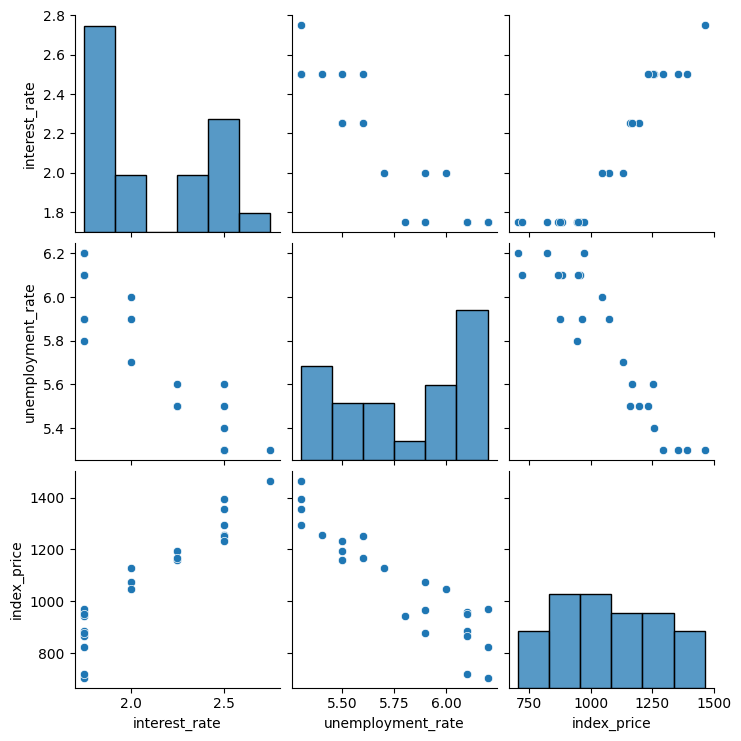

In [93]:
# Visualization
import seaborn as sns
sns.pairplot(df_index)

In [94]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployement Rate')

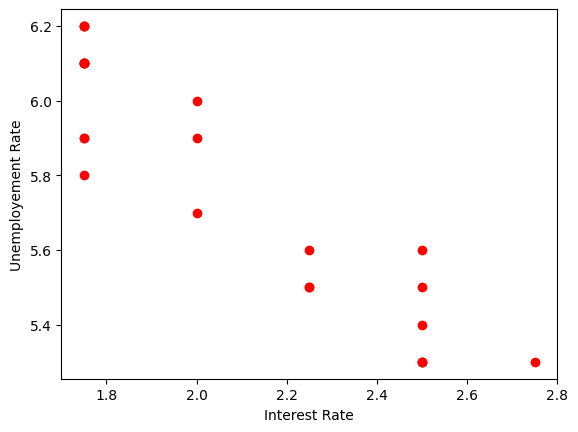

In [95]:
## visulize the data points more closely
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployement Rate")

In [96]:
# independant and dependant features
X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

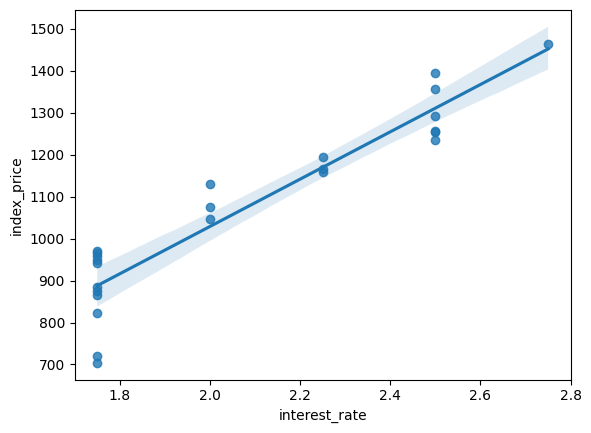

In [98]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

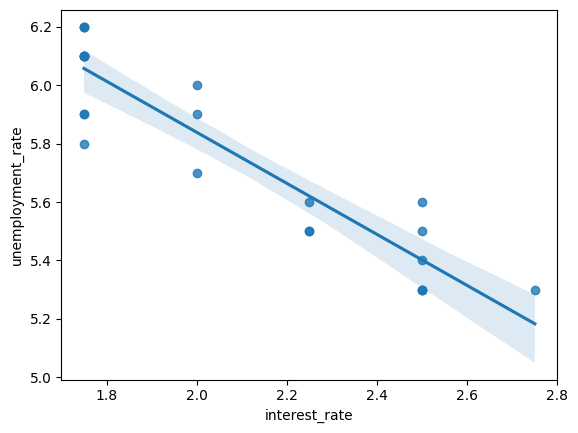

In [99]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])

In [100]:
# Standard scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [101]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [102]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [103]:
regression.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [104]:
# cross validation for the model

from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(estimator=regression, X=X_train, y=y_train, scoring='neg_mean_squared_error',
                                   cv=3)

In [105]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [106]:
## prediction
y_pred = regression.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mse =  mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse) 

8108.567426306604
73.80444932337097
90.04758423359621


In [109]:
from sklearn.metrics import r2_score

In [110]:
score = r2_score(y_test, y_pred)
print(score)
adjScore = 1 - (1 - score) * (len(y_test)) / (len(y_test) - X_test.shape[1] - 1)
print(adjScore)

0.7591371539010257
0.5182743078020513


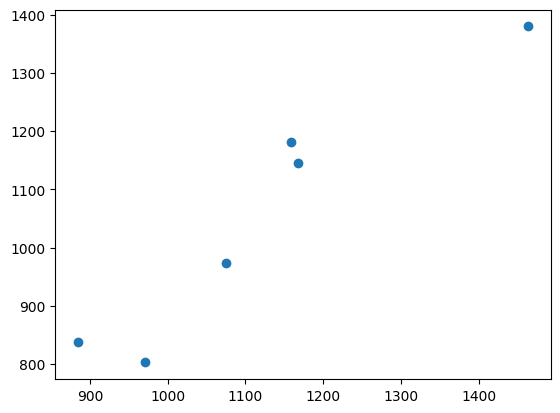

In [111]:
# Assumptions
plt.scatter(y_test, y_pred)

In [112]:
residuals = y_test - y_pred
residuals

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

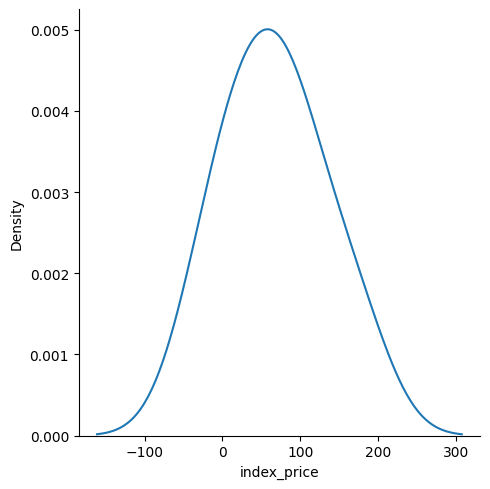

In [113]:
## Plot the residuals
sns.displot(residuals, kind='kde')

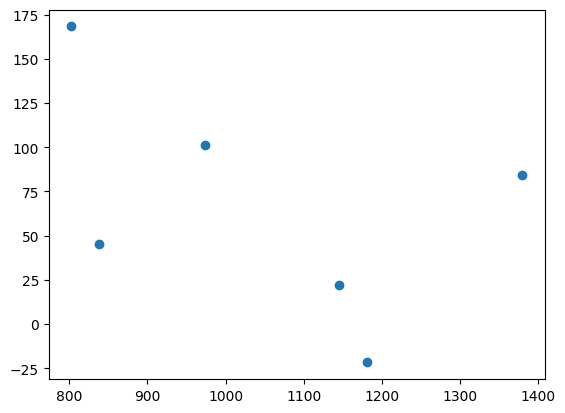

In [114]:
## create a scatter plot wrt to prediction and residuals
plt.scatter(y_pred, residuals)

In [115]:
## OLS LR
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

In [116]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 13 Dec 2025   Prob (F-statistic):                       0.754
Time:                        00:04:43   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
print(regression.coef_)

[  88.27275507 -116.25716066]
